# Titanic survival prediction powered by Tensorflow

## Objective:
Use Tensorflow high level APIs to predict survial of Titanic passanges

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf

Use Tensorflow 1.2

In [203]:
print(tf.__version__)

1.3.0


In [204]:
# Load train dataset from kaggle
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Enginieerd features

## Name

In [205]:
# Exploring the values of column 'Name'
for a_name in df['Name']:
    print(a_name)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

Sawyer, Mr. Frederick Charles
Turja, Miss. Anna Sofia
Goodwin, Mrs. Frederick (Augusta Tyler)
Cardeza, Mr. Thomas Drake Martinez
Peters, Miss. Katie
Hassab, Mr. Hammad
Olsvigen, Mr. Thor Anderson
Goodwin, Mr. Charles Edward
Brown, Mr. Thomas William Solomon
Laroche, Mr. Joseph Philippe Lemercier
Panula, Mr. Jaako Arnold
Dakic, Mr. Branko
Fischer, Mr. Eberhard Thelander
Madill, Miss. Georgette Alexandra
Dick, Mr. Albert Adrian
Karun, Miss. Manca
Lam, Mr. Ali
Saad, Mr. Khalil
Weir, Col. John
Chapman, Mr. Charles Henry
Kelly, Mr. James
Mullens, Miss. Katherine "Katie"
Thayer, Mr. John Borland
Humblen, Mr. Adolf Mathias Nicolai Olsen
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Silverthorne, Mr. Spencer Victor
Barbara, Miss. Saiide
Gallagher, Mr. Martin
Hansen, Mr. Henrik Juul
Morley, Mr. Henry Samuel ("Mr Henry Marshall")
Kelly, Mrs. Florence "Fannie"
Calderhead, Mr. Edward Pennington
Cleaver, Miss. Alice
Moubarek, Master. Halim Gonios ("William George")
Mayne, Mlle. Berthe Antonine 

Distinguish between Mr. Mrs, Miss., Master

In [206]:
def get_title(name):
    components = name.split(' ')
    if 'Mr.' in components:
        return 'Mr.'
    elif 'Mrs.' in components:
        return 'Mrs.'
    elif 'Miss.' in components:
        return 'Miss.'
    elif 'Master' in components:
        return 'Master'
    else:
        return 'Unknown'

In [207]:
df['Title'] = df['Name'].apply(get_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [208]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)

## Check correlation between Title and survival

/Users/marcobradtke/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


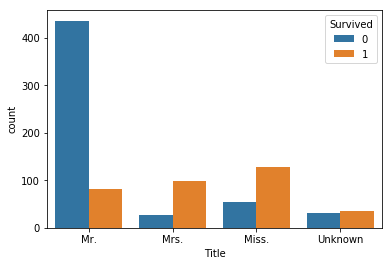

In [209]:
sns.countplot(data=df, x='Title', hue='Survived')

# Age

/Users/marcobradtke/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


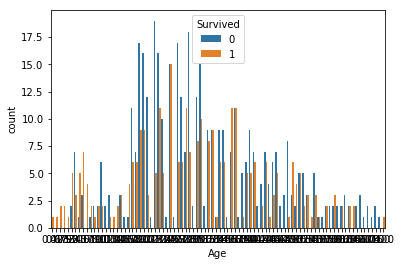

In [210]:
#Expplore data
sns.countplot('Age', data=df, hue='Survived')

In [211]:
# Without data for age
df[df['Age'].isnull()].count()

PassengerId    177
Survived       177
Pclass         177
Sex            177
Age              0
SibSp          177
Parch          177
Fare           177
Cabin           19
Embarked       177
Title          177
dtype: int64

/Users/marcobradtke/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


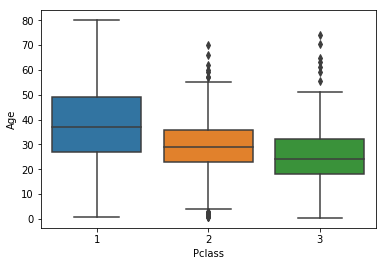

In [212]:
sns.boxplot(df['Pclass'], df['Age'])

/Users/marcobradtke/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


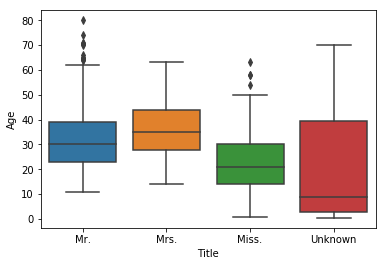

In [213]:
sns.boxplot(df['Title'], df['Age'])

In [214]:
df['Title_Class'] = df['Title'] + '_' + df['Pclass'].astype(str)

In [215]:
df.groupby('Title_Class')['Age'].mean()

Title_Class
Miss._1      30.000000
Miss._2      22.390625
Miss._3      16.123188
Mr._1        41.580460
Mr._2        32.768293
Mr._3        28.724891
Mrs._1       40.882353
Mrs._2       33.682927
Mrs._3       33.515152
Unknown_1    37.696000
Unknown_2    21.351667
Unknown_3     5.350833
Name: Age, dtype: float64

In [216]:
def new_age(cols):
    Age = cols[0]
    Title_Class = cols[1]
    if np.isnan(Age):
        if Title_Class == 'Miss._1':
            return 30
        elif Title_Class == 'Miss._2':
            return 22
        elif Title_Class == 'Miss._3':
            return 16
        elif Title_Class == 'Mr._1':
            return 42
        elif Title_Class == 'Mr._2':
            return 33
        elif Title_Class == 'Mr._3':
            return 29
        elif Title_Class == 'Mrs._1':
            return 41
        elif Title_Class == 'Mrs._2':
            return 37
        elif Title_Class == 'Mrs._3':
            return 34
        elif Title_Class == 'Unknown_1':
            return 38
        elif Title_Class == 'Unknown_2':
            return 21
        elif Title_Class == 'Unknown_3':
            return 5
    else:
        return Age

In [217]:
df['New_Age'] = df[['Age','Title_Class']].apply(new_age, axis=1)

In [218]:
df.drop('Age', axis=1, inplace=True)
df.drop('Title_Class', axis=1, inplace=True)
df.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Title,New_Age
0,1,0,3,male,1,0,7.2500,NaN,S,Mr.,22.0
1,2,1,1,female,1,0,71.2833,C85,C,Mrs.,38.0
2,3,1,3,female,0,0,7.9250,NaN,S,Miss.,26.0
3,4,1,1,female,1,0,53.1000,C123,S,Mrs.,35.0
4,5,0,3,male,0,0,8.0500,NaN,S,Mr.,35.0


# Cabin

In [219]:
#Set Deck to letter if Cabin is knonwn 
df['Deck'] = df[df['Cabin'].notnull()]['Cabin'].apply(lambda text: text[0])
#Set to U for Unknown
df['Deck'].fillna('U', inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Cleanup and create feature_columns

In [220]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,New_Age,Deck
0,1,0,3,male,1,0,7.2500,S,Mr.,22.0,U
1,2,1,1,female,1,0,71.2833,C,Mrs.,38.0,C
2,3,1,3,female,0,0,7.9250,S,Miss.,26.0,U
3,4,1,1,female,1,0,53.1000,S,Mrs.,35.0,C
4,5,0,3,male,0,0,8.0500,S,Mr.,35.0,U


In [221]:
df.drop('PassengerId', axis=1, inplace=True)

In [222]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,New_Age,Deck
0,0,3,male,1,0,7.2500,S,Mr.,22.0,U
1,1,1,female,1,0,71.2833,C,Mrs.,38.0,C
2,1,3,female,0,0,7.9250,S,Miss.,26.0,U
3,1,1,female,1,0,53.1000,S,Mrs.,35.0,C
4,0,3,male,0,0,8.0500,S,Mr.,35.0,U


In [223]:
labels = df['Survived']

In [224]:
df.drop('Survived', axis=1, inplace=True)

In [225]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,New_Age,Deck
0,3,male,1,0,7.2500,S,Mr.,22.0,U
1,1,female,1,0,71.2833,C,Mrs.,38.0,C
2,3,female,0,0,7.9250,S,Miss.,26.0,U
3,1,female,1,0,53.1000,S,Mrs.,35.0,C
4,3,male,0,0,8.0500,S,Mr.,35.0,U


# Pclass
Check for values and set cat. column

In [226]:
df['Pclass'].unique()

array([3, 1, 2])

In [227]:
Pclass = tf.feature_column.categorical_column_with_vocabulary_list(vocabulary_list=[1,2,3], key='Pclass')
feature_columns = [tf.feature_column.indicator_column(Pclass)]

# Sex
Check if no null values and set cat. column

In [228]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [229]:
Sex = tf.feature_column.categorical_column_with_vocabulary_list(vocabulary_list=["male", "female"], key='Sex')
feature_columns.append(tf.feature_column.indicator_column(Sex))

# SibSp

In [230]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [231]:
# SibSp = tf.feature_column.categorical_column_with_vocabulary_list(vocabulary_list=[1,2,3,4,5], key='SibSp')
SibSp = tf.feature_column.numeric_column(key='SibSp')
feature_columns.append(SibSp)

# Parch

In [232]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [233]:
# Parch = tf.feature_column.categorical_column_with_vocabulary_list(vocabulary_list=[1,2,3,4,5,6], key='Parch')
Parch = tf.feature_column.numeric_column(key='Parch')
feature_columns.append(Parch)

# Fare

In [234]:
df['Fare'].isnull().unique()

array([False], dtype=bool)

In [235]:
Fare = tf.feature_column.numeric_column(key='Fare')
feature_columns.append(Fare)

# Embarked

In [236]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [237]:
df['Embarked'].fillna('U', inplace=True)
df['Embarked'].unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [238]:
Embarked = tf.feature_column.categorical_column_with_vocabulary_list(vocabulary_list=['S','C','Q','U'], key='Embarked')
feature_columns.append(tf.feature_column.indicator_column(Embarked))

# New Age

In [239]:
df['New_Age'].isnull().unique()

array([False], dtype=bool)

In [240]:
New_Age = tf.feature_column.numeric_column('New_Age')
feature_columns.append(New_Age)

# Train Test Split

In [241]:
len(df['Pclass']) / 100 * 70

623.7

In [242]:
train_data = df[:623]
eval_data = df[623:]
train_label = labels[:623]
eval_label = labels[623:]

In [243]:
training_input_fn = tf.estimator.inputs.pandas_input_fn(x=train_data, y=train_label, batch_size=64,
                                                        shuffle=True, num_epochs=None )

In [244]:
eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=eval_data, y=eval_label, batch_size=64, shuffle=False)

In [245]:
classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10,20,20,20,10], n_classes=2,
                                            feature_columns=feature_columns )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c232352e8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/gy/8xw4sgkx629cmm6s3t2j40dh0000gn/T/tmpackcmkze'}


In [246]:
classifier.fit(input_fn=training_input_fn, steps=150000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/gy/8xw4sgkx629cmm6s3t2j40dh0000gn/T/tmpackcmkze/model.ckpt.
INFO:tensorflow:loss = 1.22624, step = 1
INFO:tensorflow:global_step/sec: 440.618
INFO:tensorflow:loss = 0.586667, step = 101 (0.229 sec)
INFO:tensorflow:global_step/sec: 457.511
INFO:tensorflow:loss = 0.41652, step = 201 (0.218 sec)
INFO:tensorflow:global_step/sec: 459.551
INFO:tensorflow:loss = 0.58604, step = 301 (0.218 sec)
INFO:tensorflow:global_step/sec: 458.001
INFO:tensorflow:loss = 0.440631, step = 401 (0.218 sec)
INFO:tensorflow:global_step/sec: 455.909
INFO:tensorflow:loss = 0.483843, step = 

INFO:tensorflow:global_step/sec: 449.786
INFO:tensorflow:loss = 0.210691, step = 7601 (0.223 sec)
INFO:tensorflow:global_step/sec: 463.286
INFO:tensorflow:loss = 0.243715, step = 7701 (0.216 sec)
INFO:tensorflow:global_step/sec: 469.197
INFO:tensorflow:loss = 0.400165, step = 7801 (0.213 sec)
INFO:tensorflow:global_step/sec: 464.645
INFO:tensorflow:loss = 0.265021, step = 7901 (0.215 sec)
INFO:tensorflow:global_step/sec: 467.331
INFO:tensorflow:loss = 0.278865, step = 8001 (0.214 sec)
INFO:tensorflow:global_step/sec: 445.22
INFO:tensorflow:loss = 0.251232, step = 8101 (0.225 sec)
INFO:tensorflow:global_step/sec: 466.179
INFO:tensorflow:loss = 0.206703, step = 8201 (0.215 sec)
INFO:tensorflow:global_step/sec: 455.305
INFO:tensorflow:loss = 0.232805, step = 8301 (0.220 sec)
INFO:tensorflow:global_step/sec: 467.755
INFO:tensorflow:loss = 0.385887, step = 8401 (0.214 sec)
INFO:tensorflow:global_step/sec: 466.738
INFO:tensorflow:loss = 0.333931, step = 8501 (0.214 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 0.092937, step = 15901 (0.241 sec)
INFO:tensorflow:global_step/sec: 428.044
INFO:tensorflow:loss = 0.230873, step = 16001 (0.234 sec)
INFO:tensorflow:global_step/sec: 434.355
INFO:tensorflow:loss = 0.187332, step = 16101 (0.230 sec)
INFO:tensorflow:global_step/sec: 431.332
INFO:tensorflow:loss = 0.21763, step = 16201 (0.232 sec)
INFO:tensorflow:global_step/sec: 432.288
INFO:tensorflow:loss = 0.139773, step = 16301 (0.231 sec)
INFO:tensorflow:global_step/sec: 430.217
INFO:tensorflow:loss = 0.232852, step = 16401 (0.233 sec)
INFO:tensorflow:global_step/sec: 432.671
INFO:tensorflow:loss = 0.176249, step = 16501 (0.231 sec)
INFO:tensorflow:global_step/sec: 431.79
INFO:tensorflow:loss = 0.192464, step = 16601 (0.231 sec)
INFO:tensorflow:global_step/sec: 423.139
INFO:tensorflow:loss = 0.166489, step = 16701 (0.237 sec)
INFO:tensorflow:global_step/sec: 467.041
INFO:tensorflow:loss = 0.118709, step = 16801 (0.215 sec)
INFO:tensorflow:global_step/sec: 500.248
INFO:tensorf

INFO:tensorflow:loss = 0.105115, step = 24201 (0.239 sec)
INFO:tensorflow:global_step/sec: 417.533
INFO:tensorflow:loss = 0.134936, step = 24301 (0.239 sec)
INFO:tensorflow:global_step/sec: 435.669
INFO:tensorflow:loss = 0.114681, step = 24401 (0.230 sec)
INFO:tensorflow:global_step/sec: 426.107
INFO:tensorflow:loss = 0.162383, step = 24501 (0.235 sec)
INFO:tensorflow:global_step/sec: 429.301
INFO:tensorflow:loss = 0.18272, step = 24601 (0.233 sec)
INFO:tensorflow:global_step/sec: 427.905
INFO:tensorflow:loss = 0.131035, step = 24701 (0.234 sec)
INFO:tensorflow:global_step/sec: 433.469
INFO:tensorflow:loss = 0.179541, step = 24801 (0.231 sec)
INFO:tensorflow:global_step/sec: 435.25
INFO:tensorflow:loss = 0.247302, step = 24901 (0.230 sec)
INFO:tensorflow:global_step/sec: 430.929
INFO:tensorflow:loss = 0.274256, step = 25001 (0.232 sec)
INFO:tensorflow:global_step/sec: 432.675
INFO:tensorflow:loss = 0.12826, step = 25101 (0.231 sec)
INFO:tensorflow:global_step/sec: 428.158
INFO:tensorfl

INFO:tensorflow:loss = 0.139186, step = 32501 (0.192 sec)
INFO:tensorflow:global_step/sec: 432.257
INFO:tensorflow:loss = 0.115068, step = 32601 (0.231 sec)
INFO:tensorflow:global_step/sec: 412.532
INFO:tensorflow:loss = 0.140594, step = 32701 (0.242 sec)
INFO:tensorflow:global_step/sec: 472.97
INFO:tensorflow:loss = 0.0928028, step = 32801 (0.212 sec)
INFO:tensorflow:global_step/sec: 438.366
INFO:tensorflow:loss = 0.177697, step = 32901 (0.228 sec)
INFO:tensorflow:global_step/sec: 469.025
INFO:tensorflow:loss = 0.0998101, step = 33001 (0.213 sec)
INFO:tensorflow:global_step/sec: 464.201
INFO:tensorflow:loss = 0.137601, step = 33101 (0.216 sec)
INFO:tensorflow:global_step/sec: 407.093
INFO:tensorflow:loss = 0.0964694, step = 33201 (0.245 sec)
INFO:tensorflow:global_step/sec: 397.926
INFO:tensorflow:loss = 0.143989, step = 33301 (0.251 sec)
INFO:tensorflow:global_step/sec: 399.286
INFO:tensorflow:loss = 0.0893475, step = 33401 (0.250 sec)
INFO:tensorflow:global_step/sec: 413.416
INFO:te

INFO:tensorflow:loss = 0.25628, step = 40801 (0.221 sec)
INFO:tensorflow:global_step/sec: 456.169
INFO:tensorflow:loss = 0.0795485, step = 40901 (0.219 sec)
INFO:tensorflow:global_step/sec: 461.499
INFO:tensorflow:loss = 0.152404, step = 41001 (0.217 sec)
INFO:tensorflow:global_step/sec: 439.675
INFO:tensorflow:loss = 0.183788, step = 41101 (0.228 sec)
INFO:tensorflow:global_step/sec: 499.381
INFO:tensorflow:loss = 0.14999, step = 41201 (0.201 sec)
INFO:tensorflow:global_step/sec: 544.926
INFO:tensorflow:loss = 0.104368, step = 41301 (0.183 sec)
INFO:tensorflow:global_step/sec: 461.751
INFO:tensorflow:loss = 0.171431, step = 41401 (0.216 sec)
INFO:tensorflow:global_step/sec: 465.478
INFO:tensorflow:loss = 0.223143, step = 41501 (0.215 sec)
INFO:tensorflow:global_step/sec: 465.575
INFO:tensorflow:loss = 0.256206, step = 41601 (0.215 sec)
INFO:tensorflow:global_step/sec: 468.198
INFO:tensorflow:loss = 0.156271, step = 41701 (0.214 sec)
INFO:tensorflow:global_step/sec: 462.393
INFO:tensor

INFO:tensorflow:loss = 0.165752, step = 49101 (0.240 sec)
INFO:tensorflow:global_step/sec: 448.974
INFO:tensorflow:loss = 0.22281, step = 49201 (0.222 sec)
INFO:tensorflow:global_step/sec: 468.462
INFO:tensorflow:loss = 0.123332, step = 49301 (0.214 sec)
INFO:tensorflow:global_step/sec: 467.181
INFO:tensorflow:loss = 0.16362, step = 49401 (0.214 sec)
INFO:tensorflow:global_step/sec: 468.189
INFO:tensorflow:loss = 0.112241, step = 49501 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.065
INFO:tensorflow:loss = 0.148731, step = 49601 (0.215 sec)
INFO:tensorflow:global_step/sec: 462.398
INFO:tensorflow:loss = 0.10511, step = 49701 (0.216 sec)
INFO:tensorflow:global_step/sec: 462.039
INFO:tensorflow:loss = 0.138777, step = 49801 (0.217 sec)
INFO:tensorflow:global_step/sec: 465.902
INFO:tensorflow:loss = 0.141422, step = 49901 (0.214 sec)
INFO:tensorflow:global_step/sec: 437.794
INFO:tensorflow:loss = 0.107752, step = 50001 (0.229 sec)
INFO:tensorflow:global_step/sec: 494.374
INFO:tensorfl

INFO:tensorflow:loss = 0.160305, step = 57401 (0.193 sec)
INFO:tensorflow:global_step/sec: 451.61
INFO:tensorflow:loss = 0.0456793, step = 57501 (0.221 sec)
INFO:tensorflow:global_step/sec: 465.274
INFO:tensorflow:loss = 0.110886, step = 57601 (0.215 sec)
INFO:tensorflow:global_step/sec: 465.43
INFO:tensorflow:loss = 0.163229, step = 57701 (0.215 sec)
INFO:tensorflow:global_step/sec: 466.712
INFO:tensorflow:loss = 0.0874736, step = 57801 (0.215 sec)
INFO:tensorflow:global_step/sec: 470.985
INFO:tensorflow:loss = 0.202155, step = 57901 (0.212 sec)
INFO:tensorflow:global_step/sec: 462.927
INFO:tensorflow:loss = 0.0713435, step = 58001 (0.216 sec)
INFO:tensorflow:global_step/sec: 461.889
INFO:tensorflow:loss = 0.0830424, step = 58101 (0.216 sec)
INFO:tensorflow:global_step/sec: 462.706
INFO:tensorflow:loss = 0.185685, step = 58201 (0.216 sec)
INFO:tensorflow:global_step/sec: 467.351
INFO:tensorflow:loss = 0.167761, step = 58301 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.423
INFO:ten

INFO:tensorflow:loss = 0.113376, step = 65701 (0.224 sec)
INFO:tensorflow:global_step/sec: 457.854
INFO:tensorflow:loss = 0.189638, step = 65801 (0.218 sec)
INFO:tensorflow:global_step/sec: 469.013
INFO:tensorflow:loss = 0.11835, step = 65901 (0.212 sec)
INFO:tensorflow:global_step/sec: 467.185
INFO:tensorflow:loss = 0.152518, step = 66001 (0.214 sec)
INFO:tensorflow:global_step/sec: 467.642
INFO:tensorflow:loss = 0.0711711, step = 66101 (0.214 sec)
INFO:tensorflow:global_step/sec: 470.658
INFO:tensorflow:loss = 0.0540502, step = 66201 (0.212 sec)
INFO:tensorflow:global_step/sec: 465.203
INFO:tensorflow:loss = 0.0880578, step = 66301 (0.215 sec)
INFO:tensorflow:global_step/sec: 470.008
INFO:tensorflow:loss = 0.0914045, step = 66401 (0.213 sec)
INFO:tensorflow:global_step/sec: 466.684
INFO:tensorflow:loss = 0.0372293, step = 66501 (0.214 sec)
INFO:tensorflow:global_step/sec: 466.832
INFO:tensorflow:loss = 0.0962347, step = 66601 (0.214 sec)
INFO:tensorflow:global_step/sec: 471.056
INFO:

INFO:tensorflow:loss = 0.0821418, step = 74001 (0.219 sec)
INFO:tensorflow:global_step/sec: 455.483
INFO:tensorflow:loss = 0.185046, step = 74101 (0.220 sec)
INFO:tensorflow:global_step/sec: 464.708
INFO:tensorflow:loss = 0.18527, step = 74201 (0.215 sec)
INFO:tensorflow:global_step/sec: 467.762
INFO:tensorflow:loss = 0.11028, step = 74301 (0.214 sec)
INFO:tensorflow:global_step/sec: 468.073
INFO:tensorflow:loss = 0.116225, step = 74401 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.656
INFO:tensorflow:loss = 0.0983765, step = 74501 (0.215 sec)
INFO:tensorflow:global_step/sec: 428.274
INFO:tensorflow:loss = 0.0553588, step = 74601 (0.234 sec)
INFO:tensorflow:global_step/sec: 500.586
INFO:tensorflow:loss = 0.219861, step = 74701 (0.201 sec)
INFO:tensorflow:global_step/sec: 548.853
INFO:tensorflow:loss = 0.171419, step = 74801 (0.182 sec)
INFO:tensorflow:global_step/sec: 468.194
INFO:tensorflow:loss = 0.191186, step = 74901 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.694
INFO:tens

INFO:tensorflow:loss = 0.103809, step = 82301 (0.221 sec)
INFO:tensorflow:global_step/sec: 456.242
INFO:tensorflow:loss = 0.152683, step = 82401 (0.219 sec)
INFO:tensorflow:global_step/sec: 463.652
INFO:tensorflow:loss = 0.177677, step = 82501 (0.216 sec)
INFO:tensorflow:global_step/sec: 466.936
INFO:tensorflow:loss = 0.179995, step = 82601 (0.214 sec)
INFO:tensorflow:global_step/sec: 465.976
INFO:tensorflow:loss = 0.0771287, step = 82701 (0.215 sec)
INFO:tensorflow:global_step/sec: 466.593
INFO:tensorflow:loss = 0.152372, step = 82801 (0.214 sec)
INFO:tensorflow:global_step/sec: 461.906
INFO:tensorflow:loss = 0.138416, step = 82901 (0.217 sec)
INFO:tensorflow:global_step/sec: 465.041
INFO:tensorflow:loss = 0.161659, step = 83001 (0.215 sec)
INFO:tensorflow:global_step/sec: 465.242
INFO:tensorflow:loss = 0.0957414, step = 83101 (0.215 sec)
INFO:tensorflow:global_step/sec: 468.755
INFO:tensorflow:loss = 0.134925, step = 83201 (0.213 sec)
INFO:tensorflow:global_step/sec: 468.159
INFO:ten

INFO:tensorflow:loss = 0.159291, step = 90601 (0.222 sec)
INFO:tensorflow:global_step/sec: 442.63
INFO:tensorflow:loss = 0.14798, step = 90701 (0.227 sec)
INFO:tensorflow:global_step/sec: 491.041
INFO:tensorflow:loss = 0.100641, step = 90801 (0.204 sec)
INFO:tensorflow:global_step/sec: 548.489
INFO:tensorflow:loss = 0.0977613, step = 90901 (0.182 sec)
INFO:tensorflow:global_step/sec: 463.388
INFO:tensorflow:loss = 0.0848153, step = 91001 (0.214 sec)
INFO:tensorflow:global_step/sec: 471.311
INFO:tensorflow:loss = 0.185949, step = 91101 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.727
INFO:tensorflow:loss = 0.0932088, step = 91201 (0.214 sec)
INFO:tensorflow:global_step/sec: 430.012
INFO:tensorflow:loss = 0.207181, step = 91301 (0.233 sec)
INFO:tensorflow:global_step/sec: 495.82
INFO:tensorflow:loss = 0.0718881, step = 91401 (0.203 sec)
INFO:tensorflow:global_step/sec: 560.203
INFO:tensorflow:loss = 0.121053, step = 91501 (0.178 sec)
INFO:tensorflow:global_step/sec: 480.7
INFO:tensor

INFO:tensorflow:loss = 0.124482, step = 98901 (0.220 sec)
INFO:tensorflow:global_step/sec: 460.087
INFO:tensorflow:loss = 0.104421, step = 99001 (0.218 sec)
INFO:tensorflow:global_step/sec: 459.65
INFO:tensorflow:loss = 0.10964, step = 99101 (0.217 sec)
INFO:tensorflow:global_step/sec: 467.928
INFO:tensorflow:loss = 0.116032, step = 99201 (0.214 sec)
INFO:tensorflow:global_step/sec: 467.388
INFO:tensorflow:loss = 0.0842772, step = 99301 (0.214 sec)
INFO:tensorflow:global_step/sec: 465.311
INFO:tensorflow:loss = 0.116281, step = 99401 (0.215 sec)
INFO:tensorflow:global_step/sec: 469.259
INFO:tensorflow:loss = 0.119834, step = 99501 (0.213 sec)
INFO:tensorflow:global_step/sec: 461.683
INFO:tensorflow:loss = 0.212345, step = 99601 (0.217 sec)
INFO:tensorflow:global_step/sec: 455.552
INFO:tensorflow:loss = 0.104039, step = 99701 (0.219 sec)
INFO:tensorflow:global_step/sec: 469.828
INFO:tensorflow:loss = 0.162321, step = 99801 (0.212 sec)
INFO:tensorflow:global_step/sec: 462.727
INFO:tensor

INFO:tensorflow:global_step/sec: 459.194
INFO:tensorflow:loss = 0.134268, step = 107201 (0.218 sec)
INFO:tensorflow:global_step/sec: 464.822
INFO:tensorflow:loss = 0.149424, step = 107301 (0.214 sec)
INFO:tensorflow:global_step/sec: 468.106
INFO:tensorflow:loss = 0.180796, step = 107401 (0.214 sec)
INFO:tensorflow:global_step/sec: 457.938
INFO:tensorflow:loss = 0.0645929, step = 107501 (0.218 sec)
INFO:tensorflow:global_step/sec: 463.175
INFO:tensorflow:loss = 0.131492, step = 107601 (0.216 sec)
INFO:tensorflow:global_step/sec: 468.764
INFO:tensorflow:loss = 0.0960922, step = 107701 (0.213 sec)
INFO:tensorflow:global_step/sec: 469.854
INFO:tensorflow:loss = 0.107363, step = 107801 (0.213 sec)
INFO:tensorflow:global_step/sec: 463.524
INFO:tensorflow:loss = 0.181757, step = 107901 (0.216 sec)
INFO:tensorflow:global_step/sec: 463.269
INFO:tensorflow:loss = 0.101025, step = 108001 (0.216 sec)
INFO:tensorflow:global_step/sec: 465.164
INFO:tensorflow:loss = 0.12863, step = 108101 (0.215 sec)

INFO:tensorflow:global_step/sec: 450.503
INFO:tensorflow:loss = 0.0834358, step = 115401 (0.222 sec)
INFO:tensorflow:global_step/sec: 466.958
INFO:tensorflow:loss = 0.0723201, step = 115501 (0.214 sec)
INFO:tensorflow:global_step/sec: 467.646
INFO:tensorflow:loss = 0.0948636, step = 115601 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.695
INFO:tensorflow:loss = 0.14538, step = 115701 (0.215 sec)
INFO:tensorflow:global_step/sec: 465.235
INFO:tensorflow:loss = 0.141801, step = 115801 (0.215 sec)
INFO:tensorflow:global_step/sec: 498.147
INFO:tensorflow:loss = 0.081113, step = 115901 (0.202 sec)
INFO:tensorflow:global_step/sec: 463.524
INFO:tensorflow:loss = 0.143979, step = 116001 (0.214 sec)
INFO:tensorflow:global_step/sec: 470.619
INFO:tensorflow:loss = 0.085206, step = 116101 (0.213 sec)
INFO:tensorflow:global_step/sec: 465.863
INFO:tensorflow:loss = 0.156679, step = 116201 (0.214 sec)
INFO:tensorflow:global_step/sec: 458.514
INFO:tensorflow:loss = 0.058421, step = 116301 (0.218 sec

INFO:tensorflow:global_step/sec: 435.857
INFO:tensorflow:loss = 0.115737, step = 123601 (0.230 sec)
INFO:tensorflow:global_step/sec: 565.649
INFO:tensorflow:loss = 0.0913842, step = 123701 (0.177 sec)
INFO:tensorflow:global_step/sec: 466.07
INFO:tensorflow:loss = 0.0928278, step = 123801 (0.214 sec)
INFO:tensorflow:global_step/sec: 468.647
INFO:tensorflow:loss = 0.0938875, step = 123901 (0.214 sec)
INFO:tensorflow:global_step/sec: 464.51
INFO:tensorflow:loss = 0.0718812, step = 124001 (0.215 sec)
INFO:tensorflow:global_step/sec: 459.316
INFO:tensorflow:loss = 0.114418, step = 124101 (0.218 sec)
INFO:tensorflow:global_step/sec: 457.118
INFO:tensorflow:loss = 0.169191, step = 124201 (0.219 sec)
INFO:tensorflow:global_step/sec: 503.681
INFO:tensorflow:loss = 0.0994365, step = 124301 (0.198 sec)
INFO:tensorflow:global_step/sec: 530.327
INFO:tensorflow:loss = 0.243216, step = 124401 (0.189 sec)
INFO:tensorflow:global_step/sec: 464.952
INFO:tensorflow:loss = 0.0622479, step = 124501 (0.214 s

INFO:tensorflow:global_step/sec: 453.043
INFO:tensorflow:loss = 0.093867, step = 131801 (0.220 sec)
INFO:tensorflow:global_step/sec: 466.624
INFO:tensorflow:loss = 0.138489, step = 131901 (0.215 sec)
INFO:tensorflow:global_step/sec: 464.82
INFO:tensorflow:loss = 0.068007, step = 132001 (0.215 sec)
INFO:tensorflow:global_step/sec: 464.451
INFO:tensorflow:loss = 0.131602, step = 132101 (0.215 sec)
INFO:tensorflow:global_step/sec: 460.957
INFO:tensorflow:loss = 0.0610381, step = 132201 (0.217 sec)
INFO:tensorflow:global_step/sec: 464.313
INFO:tensorflow:loss = 0.127359, step = 132301 (0.215 sec)
INFO:tensorflow:global_step/sec: 467.021
INFO:tensorflow:loss = 0.115512, step = 132401 (0.214 sec)
INFO:tensorflow:global_step/sec: 467.041
INFO:tensorflow:loss = 0.0919294, step = 132501 (0.214 sec)
INFO:tensorflow:global_step/sec: 457.119
INFO:tensorflow:loss = 0.145384, step = 132601 (0.219 sec)
INFO:tensorflow:global_step/sec: 467.207
INFO:tensorflow:loss = 0.0700475, step = 132701 (0.213 sec

INFO:tensorflow:global_step/sec: 466.984
INFO:tensorflow:loss = 0.0498671, step = 140001 (0.214 sec)
INFO:tensorflow:global_step/sec: 443.486
INFO:tensorflow:loss = 0.129208, step = 140101 (0.226 sec)
INFO:tensorflow:global_step/sec: 466.318
INFO:tensorflow:loss = 0.155246, step = 140201 (0.214 sec)
INFO:tensorflow:global_step/sec: 460.498
INFO:tensorflow:loss = 0.0744191, step = 140301 (0.217 sec)
INFO:tensorflow:global_step/sec: 461.666
INFO:tensorflow:loss = 0.115198, step = 140401 (0.217 sec)
INFO:tensorflow:global_step/sec: 466.196
INFO:tensorflow:loss = 0.111908, step = 140501 (0.214 sec)
INFO:tensorflow:global_step/sec: 465.599
INFO:tensorflow:loss = 0.120649, step = 140601 (0.215 sec)
INFO:tensorflow:global_step/sec: 463.819
INFO:tensorflow:loss = 0.0982015, step = 140701 (0.216 sec)
INFO:tensorflow:global_step/sec: 461.491
INFO:tensorflow:loss = 0.0598989, step = 140801 (0.217 sec)
INFO:tensorflow:global_step/sec: 463.645
INFO:tensorflow:loss = 0.217358, step = 140901 (0.216 s

INFO:tensorflow:global_step/sec: 450.562
INFO:tensorflow:loss = 0.0964154, step = 148201 (0.222 sec)
INFO:tensorflow:global_step/sec: 464.827
INFO:tensorflow:loss = 0.0706427, step = 148301 (0.215 sec)
INFO:tensorflow:global_step/sec: 461.802
INFO:tensorflow:loss = 0.127982, step = 148401 (0.216 sec)
INFO:tensorflow:global_step/sec: 467.546
INFO:tensorflow:loss = 0.0728326, step = 148501 (0.214 sec)
INFO:tensorflow:global_step/sec: 466.485
INFO:tensorflow:loss = 0.138563, step = 148601 (0.215 sec)
INFO:tensorflow:global_step/sec: 467.347
INFO:tensorflow:loss = 0.226991, step = 148701 (0.214 sec)
INFO:tensorflow:global_step/sec: 468.865
INFO:tensorflow:loss = 0.127584, step = 148801 (0.213 sec)
INFO:tensorflow:global_step/sec: 466.264
INFO:tensorflow:loss = 0.101657, step = 148901 (0.215 sec)
INFO:tensorflow:global_step/sec: 462.78
INFO:tensorflow:loss = 0.124966, step = 149001 (0.216 sec)
INFO:tensorflow:global_step/sec: 464.764
INFO:tensorflow:loss = 0.0916872, step = 149101 (0.215 se

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x1c23235828>, 'hidden_units': [10, 20, 20, 20, 10], 'feature_columns': (_IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), _NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _IndicatorColumn(categorical_column=_VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q', 'U'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), 

In [247]:
classifier.evaluate(input_fn=eval_input_fn)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-11-30-21:11:52
INFO:tensorflow:Restoring parameters from /var/folders/gy/8xw4sgkx629cmm6s3t2j40dh0000gn/T/tmpackcmkze/model.ckpt-150000
INFO:tensorflow:Finished evaluation at 2017-11-30-21:11:52
INFO:tensorflow:Saving dict for global step 150000: accuracy = 0.802239, accuracy/baseline_label_mean = 0.358209, accuracy/threshold_0.500000_mean = 0.802239, auc = 0.794362, auc_precision_recall = 0.763967, global_step = 150000, labels/actual_label_mean = 0.358209, labels/prediction_mean = 0.413599, loss = 2.25277, precision/positive_threshold_0.500000_mean = 0.708738, recall/positive_threshold_0.500000_mean = 0.760417


{'accuracy': 0.80223882,
 'accuracy/baseline_label_mean': 0.35820895,
 'accuracy/threshold_0.500000_mean': 0.80223882,
 'auc': 0.79436159,
 'auc_precision_recall': 0.76396734,
 'global_step': 150000,
 'labels/actual_label_mean': 0.35820895,
 'labels/prediction_mean': 0.41359934,
 'loss': 2.252768,
 'precision/positive_threshold_0.500000_mean': 0.70873785,
 'recall/positive_threshold_0.500000_mean': 0.76041669}

### 150.000 steps -> accuracy 0.824
### 500.000 steps -> accuracy 0.828